# Basic R in Jupyter

In [3]:
myString <- "Hello World"
print(myString)

[1] "Hello World"


# R dataset access

In [4]:
data(iris)

In [5]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

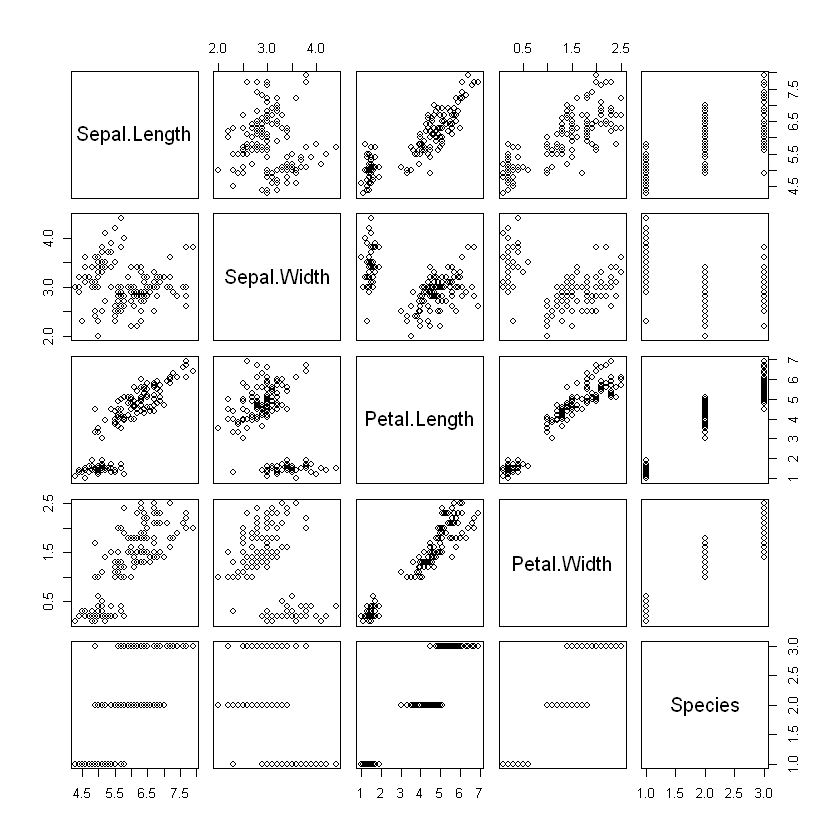

In [6]:
plot(iris)

# R 3D graphics in Jupyter


persp> require(grDevices) # for trans3d

persp> ## More examples in  demo(persp) !!
persp> ##                   -----------
persp> 
persp> # (1) The Obligatory Mathematical surface.
persp> #     Rotated sinc function.
persp> 
persp> x <- seq(-10, 10, length= 30)

persp> y <- x

persp> f <- function(x, y) { r <- sqrt(x^2+y^2); 10 * sin(r)/r }

persp> z <- outer(x, y, f)

persp> z[is.na(z)] <- 1

persp> op <- par(bg = "white")

persp> persp(x, y, z, theta = 30, phi = 30, expand = 0.5, col = "lightblue")

persp> persp(x, y, z, theta = 30, phi = 30, expand = 0.5, col = "lightblue",
persp+       ltheta = 120, shade = 0.75, ticktype = "detailed",
persp+       xlab = "X", ylab = "Y", zlab = "Sinc( r )"
persp+ ) -> res


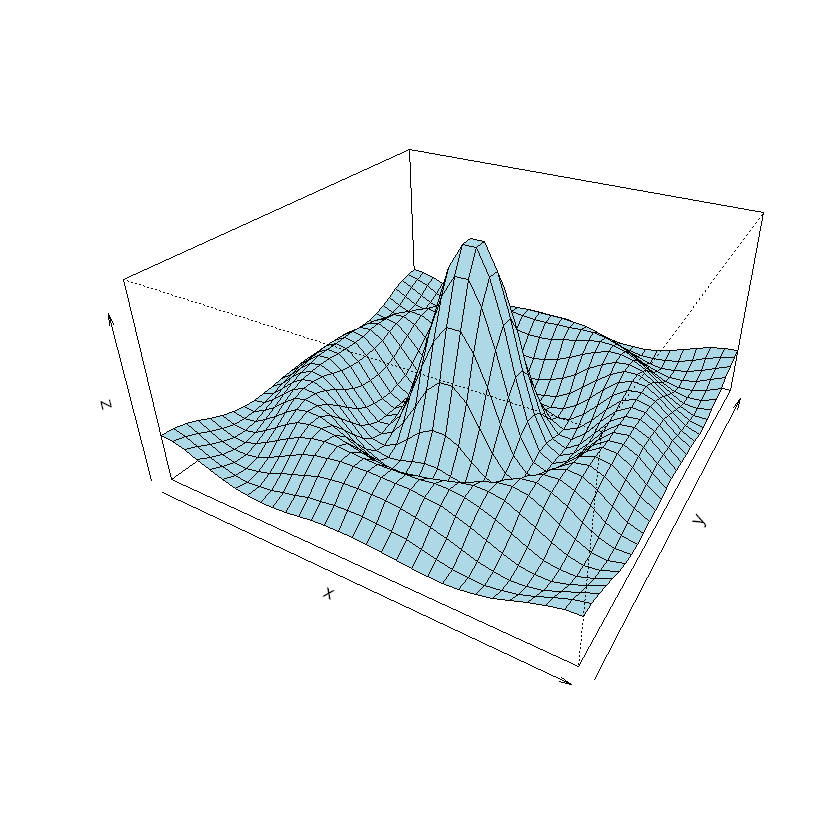


persp> round(res, 3)
      [,1]   [,2]   [,3]   [,4]
[1,] 0.087 -0.025  0.043 -0.043
[2,] 0.050  0.043 -0.075  0.075
[3,] 0.000  0.074  0.042 -0.042
[4,] 0.000 -0.273 -2.890  3.890

persp> # (2) Add to existing persp plot - using trans3d() :
persp> 
persp> xE <- c(-10,10); xy <- expand.grid(xE, xE)

persp> points(trans3d(xy[,1], xy[,2], 6, pmat = res), col = 2, pch = 16)

persp> lines (trans3d(x, y = 10, z = 6 + sin(x), pmat = res), col = 3)

persp> phi <- seq(0, 2*pi, len = 201)

persp> r1 <- 7.725 # radius of 2nd maximum

persp> xr <- r1 * cos(phi)

persp> yr <- r1 * sin(phi)

persp> lines(trans3d(xr,yr, f(xr,yr), res), col = "pink", lwd = 2)

persp> ## (no hidden lines)
persp> 
persp> # (3) Visualizing a simple DEM model
persp> 
persp> z <- 2 * volcano        # Exaggerate the relief

persp> x <- 10 * (1:nrow(z))   # 10 meter spacing (S to N)

persp> y <- 10 * (1:ncol(z))   # 10 meter spacing (E to W)

persp> ## Don't draw the grid lines :  border = NA
persp> par(bg = "slategray")



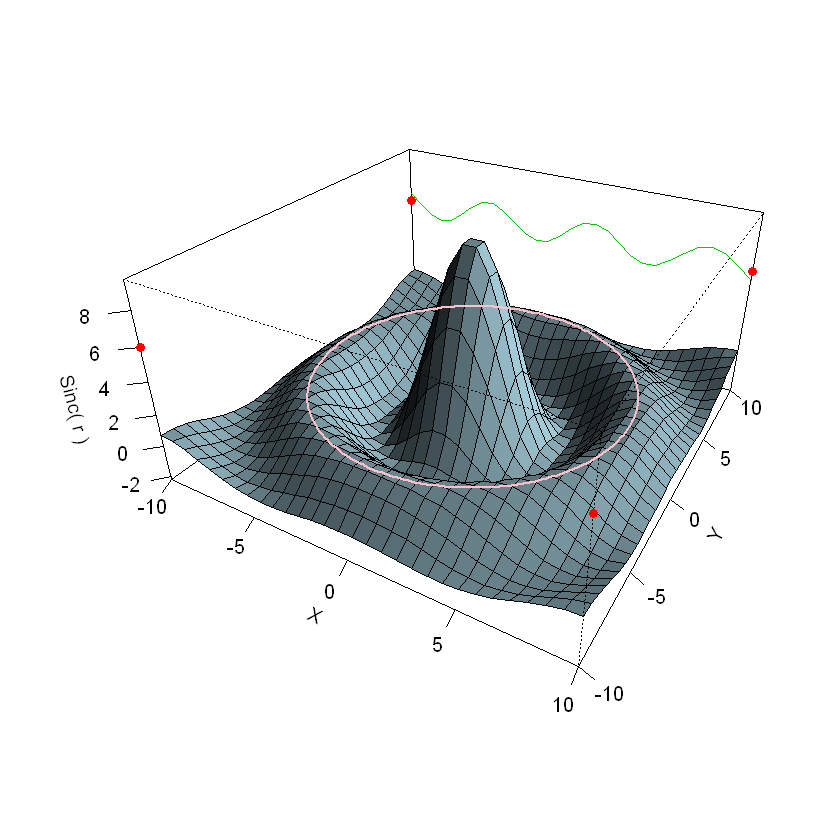


persp> # (4) Surface colours corresponding to z-values
persp> 
persp> par(bg = "white")

persp> x <- seq(-1.95, 1.95, length = 30)

persp> y <- seq(-1.95, 1.95, length = 35)

persp> z <- outer(x, y, function(a, b) a*b^2)

persp> nrz <- nrow(z)

persp> ncz <- ncol(z)

persp> # Create a function interpolating colors in the range of specified colors
persp> jet.colors <- colorRampPalette( c("blue", "green") )

persp> # Generate the desired number of colors from this palette
persp> nbcol <- 100

persp> color <- jet.colors(nbcol)

persp> # Compute the z-value at the facet centres
persp> zfacet <- z[-1, -1] + z[-1, -ncz] + z[-nrz, -1] + z[-nrz, -ncz]

persp> # Recode facet z-values into color indices
persp> facetcol <- cut(zfacet, nbcol)

persp> persp(x, y, z, col = color[facetcol], phi = 30, theta = -30)


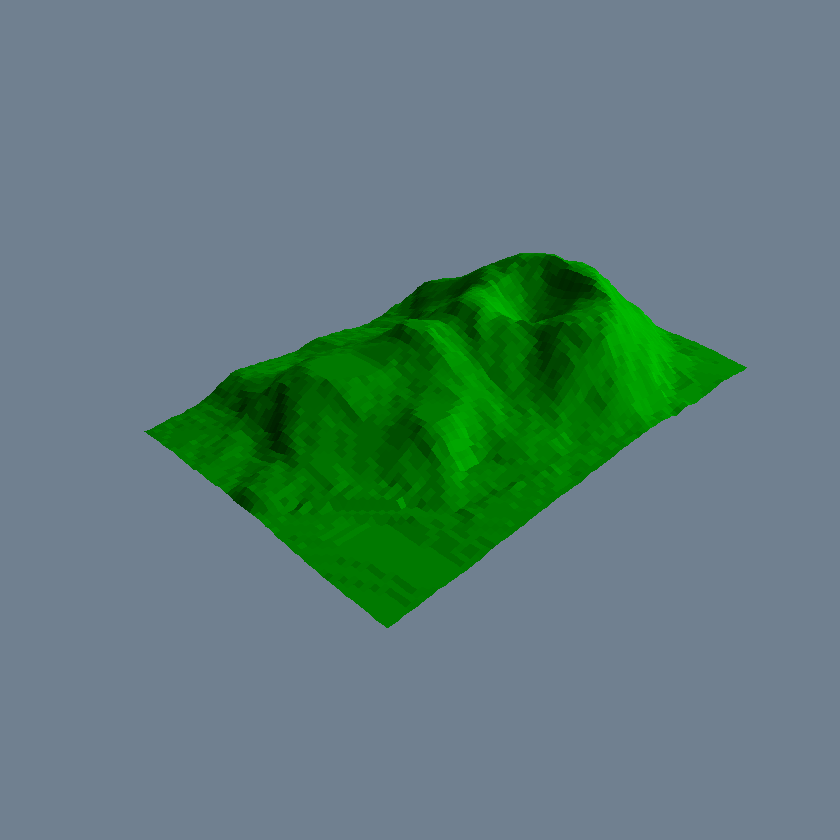


persp> par(op)


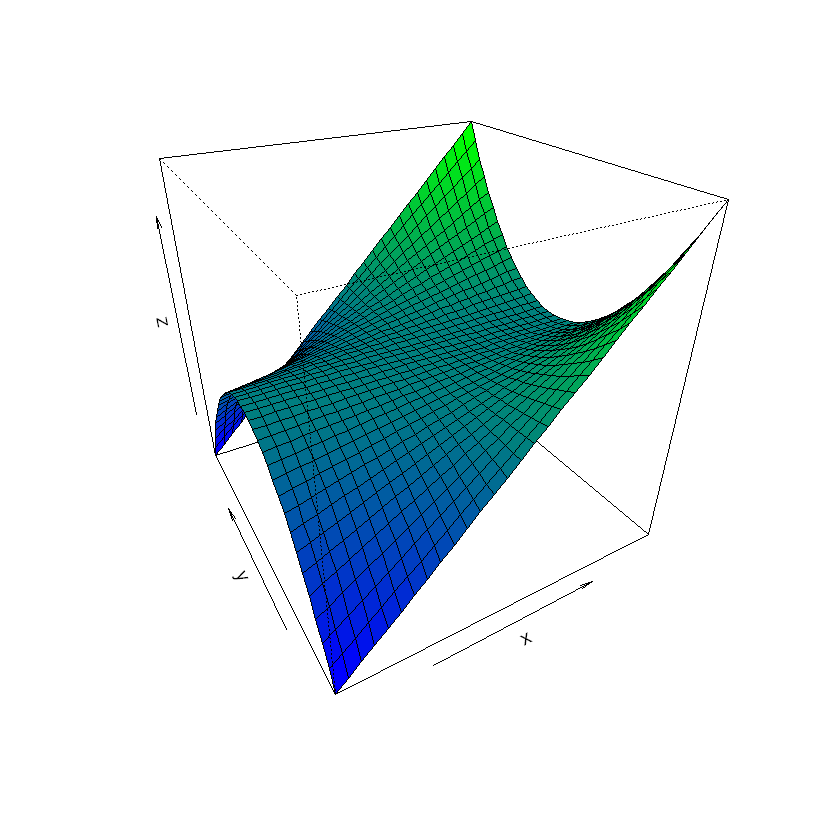

In [7]:
example(persp)

# R 3D scatterplot in Jupyter

In [9]:
# make sure lattice package is installed
library('lattice')

In [16]:
# use the automobile data from ics.edu
mydata <- read.table("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [18]:
# define more meaningful column names for the display
colnames(mydata) <- c("mpg", "cylinders", "displacement",
"horsepower", "weight", "acceleration", "model.year", "origin",
"car.name")

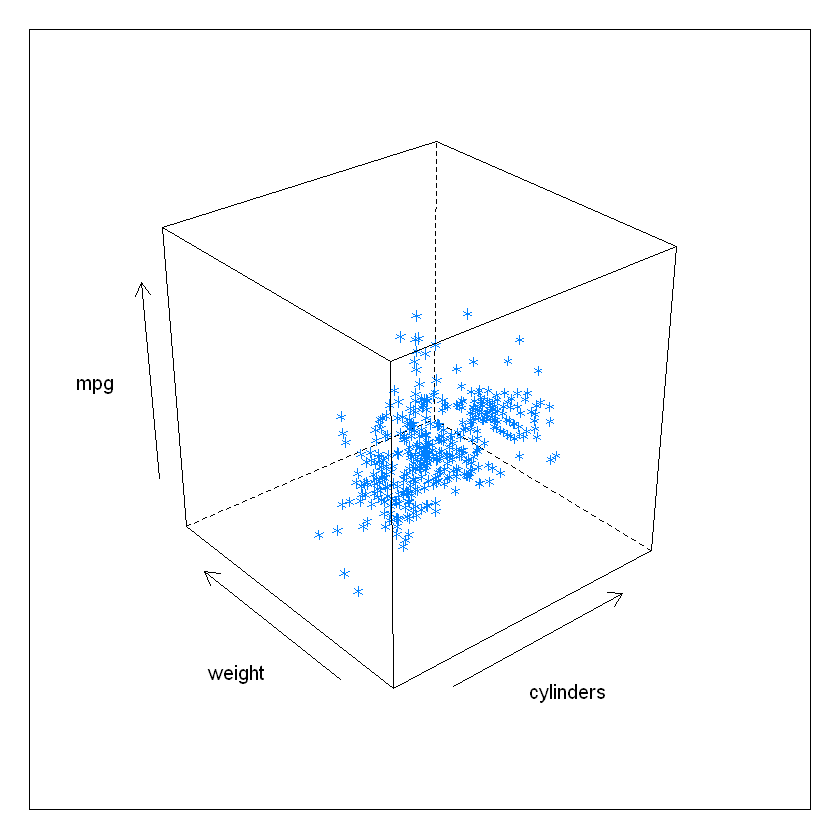

In [19]:
# 3-D plot with number of cylinders on x axis, weight of the vehicle on the y axis and miles per gallon on the z axis.
cloud(mpg~cylinders*weight, data=mydata)

# R cluster analysis

In [22]:
# load the wheat data set from uci.edu
wheat <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt", sep="\t")

In [23]:
# define useful column names
colnames(wheat) <-c("area", "perimeter", "compactness", "length","width", "asymmetry", "groove", "undefined")

In [24]:
# exclude incomplete cases from the data
wheat <- wheat[complete.cases(wheat),]

In [26]:
# calculate the clusters
fit <- kmeans(wheat, 5)
fit

K-means clustering with 5 clusters of sizes 67, 55, 15, 29, 32

Cluster means:
      area perimeter compactness   length    width asymmetry   groove undefined
1 11.91478  13.26194   0.8504254 5.232299 2.861075  4.794955 5.113313  2.910448
2 14.14055  14.21073   0.8789073 5.478364 3.220527  2.471295 5.044873  1.036364
3 19.58333  16.64600   0.8877267 6.315867 3.835067  5.081533 6.144400  2.000000
4 16.45345  15.35310   0.8768000 5.882655 3.462517  3.913207 5.707655  1.724138
5 18.95781  16.39563   0.8862125 6.250469 3.742781  2.719813 6.116938  2.000000

Clustering vector:
  1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  19  20  21  22 
  2   2   2   2   2   2   4   4   4   2   2   2   2   2   2   2   2   1   2   2 
 23  24  25  26  27  28  29  30  31  32  33  34  35  38  39  40  41  42  43  44 
  2   2   2   2   2   2   2   2   2   4   2   2   2   4   4   2   1   2   2   2 
 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  64  65  66 
  4   2   2   2 

# R forecasting

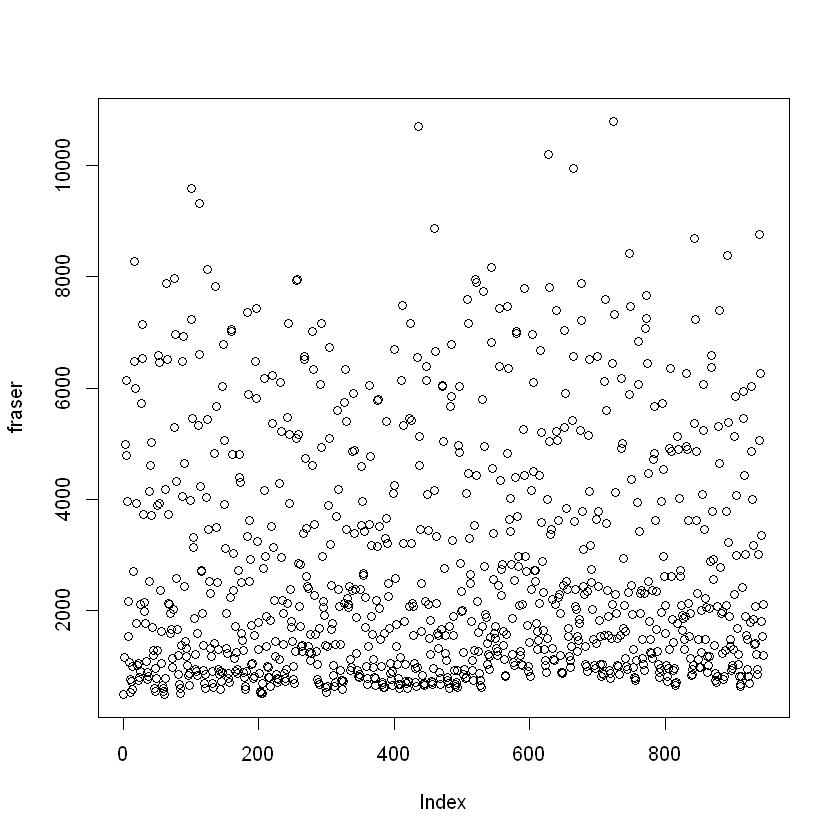

In [2]:
library(forecast)
fraser <- scan("data/fraser.txt")
plot(fraser)

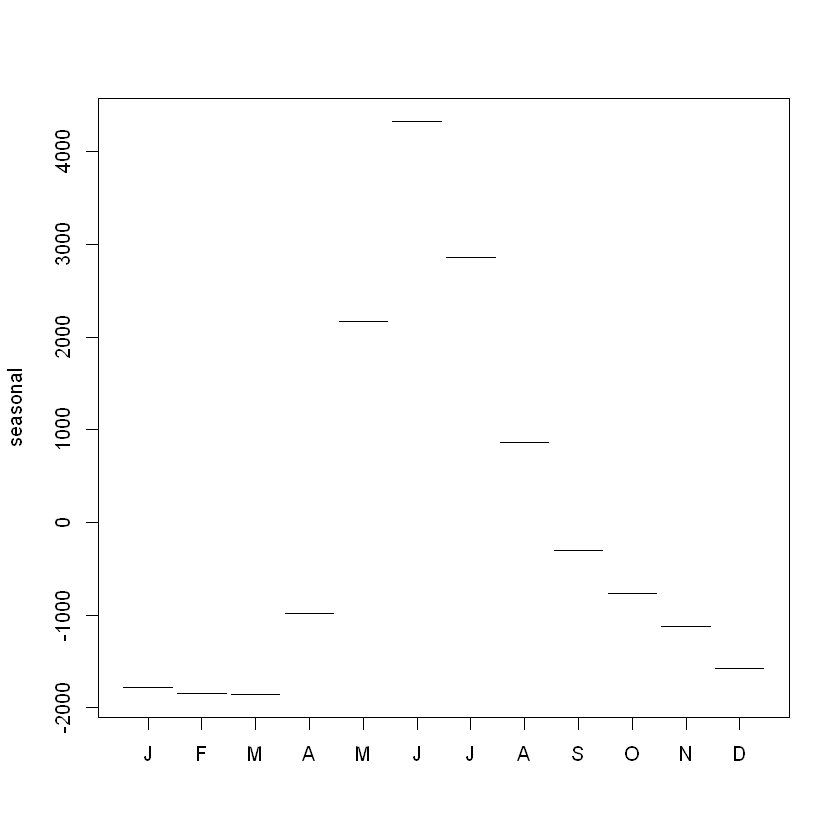

In [3]:
fraser.ts <- ts(fraser, frequency=12, start=c(1913,3))
fraser.stl = stl(fraser.ts, s.window="periodic")
monthplot(fraser.stl)

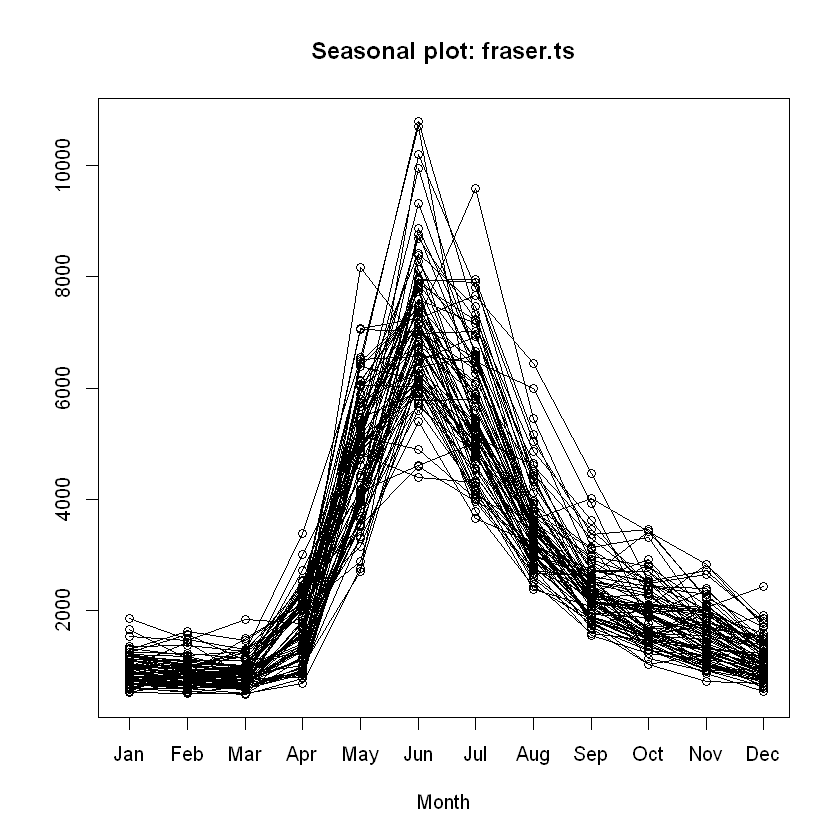

In [4]:
seasonplot(fraser.ts)